In [14]:
from qiskit import *
from qiskit import Aer
backend = Aer.get_backend('unitary_simulator')
import numpy as np
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [21]:
qudit_dimensions = [5] #later an given arguement
qd_size = int(np.ceil(np.log2(qudit_dimensions[0]))) #later not needed

qd = QuantumRegister(qd_size) #later replaced with QuditRegister(qudit_dimensions)
qdc = QuantumCircuit(qd) #later replaced with QuditCircuit(qd)

w = 2*np.pi/qudit_dimensions[0]
for i in range(qd.size):
    qdc.p(w*2**(qd.size-i-1), qd[qd.size-i-1]) #qd for multiple qudits (here not the case) will need qd[qudit_nr][qubit_nr]. qd[x] == qd[0][x]

 [ 1.  +0.j    0.31+0.95j -0.81+0.59j -0.81-0.59j  0.31-0.95j  1.  -0.j    0.31+0.95j -0.81+0.59j]

[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.31+0.95j  0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [-0.  +0.j   -0.  +0.j   -0.81+0.59j -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j  ]
 [-0.  +0.j   -0.  +0.j   -0.  +0.j   -0.81-0.59j -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.31-0.95j  0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    1.  -0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.31+0.95j  0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j   -0.81+0.59j]]


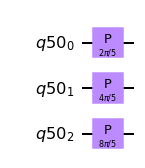

In [22]:
job = execute(qdc, backend)
result = job.result()
U = result.get_unitary(qdc)
print("", np.round(np.exp(1j*w)**np.arange(2**qd.size), decimals=2))
print()
print(U)
qdc.draw(output="mpl")
